In [3]:
# -*- coding:utf-8 -*-
import pandas as pd 
datafile = '../data/air_data.csv'
resultfile = '../data/explore.xls'

data = pd.read_csv(datafile, encoding='utf-8')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [6]:
explore = data.describe(percentiles=[], include='all').T
explore['null'] = len(data) - explore['count']
explore = explore[['null', 'max', 'min']]
explore.columns = [u'空值数',u'最大值',u'最小值']
explore.to_excel(resultfile)

In [8]:
explore_data=pd.read_excel('../data/explore.xls')
explore_data.describe()

,空值数,最大值,最小值
count,44.000000,36.000000,36.000000
mean,151.181818,240071.632361,10.618056
std,594.009916,336000.005678,61.277661
min,0.000000,0.000000,0.000000
25%,0.000000,94.000000,0.000000
50%,0.000000,31859.500000,0.000000
75%,0.000000,518591.035000,0.000000
max,3245.000000,985572.000000,368.000000


In [9]:
cleanfile = '../data/data_cleaned.csv'
data = data[data['SUM_YR_1'].notnull()*data['SUM_YR_2'].notnull()]

D:\Users\fanmin\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [10]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [11]:
index1 = data.SUM_YR_1 != 0
index2 = data.SUM_YR_2 != 0
index3 = (data.SEG_KM_SUM == 0) & (data.avg_discount == 0)
data = data[index1 | index2 | index3]
data.to_csv('../data/data_cleaned.csv')

In [18]:
non_normal_data = pd.read_excel('../data/zscoredata.xls')
non_normal_data .head()

,L,R,F,M,C
0,97.43,6.60,3,18770,0.66
1,97.43,3.80,24,35087,0.62
2,97.20,2.80,9,20660,0.52
3,93.03,1.00,12,23071,0.51
4,74.83,3.17,3,2897,0.95


In [19]:
normal_data = (non_normal_data - non_normal_data.mean(axis = 0)) / non_normal_data.std(axis=0)

In [20]:
normal_data.head()

,L,R,F,M,C
0,1.689882,0.140299,-0.635788,0.068794,-0.337186
1,1.689882,-0.322442,0.852453,0.843848,-0.553613
2,1.681743,-0.487707,-0.210576,0.158569,-1.094680
3,1.534185,-0.785184,0.002030,0.273091,-1.148787
4,0.890167,-0.426559,-0.635788,-0.685170,1.231909


In [22]:
normal_data.columns = ['Z'+i for i in normal_data.columns]
normal_data.to_excel('../data/zscored-data.xls', index=False)

In [23]:
normal_data.head()

,ZL,ZR,ZF,ZM,ZC
0,1.689882,0.140299,-0.635788,0.068794,-0.337186
1,1.689882,-0.322442,0.852453,0.843848,-0.553613
2,1.681743,-0.487707,-0.210576,0.158569,-1.094680
3,1.534185,-0.785184,0.002030,0.273091,-1.148787
4,0.890167,-0.426559,-0.635788,-0.685170,1.231909


In [24]:
from sklearn.cluster import KMeans
inputfile = '../data/zscored-data.xls'
k =5
data = pd.read_excel(inputfile)
kmodel = KMeans(n_clusters= k, n_jobs=4)
kmodel.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
kmodel.cluster_centers_

array([[-0.31466804,  1.68541624, -0.57418724, -0.53703776, -0.16521307],
       [ 0.48282943, -0.79950018,  2.48200653,  2.42305758,  0.30155511],
       [ 1.15645752, -0.37533908, -0.09023959, -0.09819221, -0.15426426],
       [-0.70118122, -0.41217673, -0.16308791, -0.16365212, -0.24213223],
       [ 0.09397994, -0.0104788 , -0.20402368, -0.20325783,  2.28732542]])

In [26]:
kmodel.labels_

array([2, 2, 2, ..., 2, 2, 2])

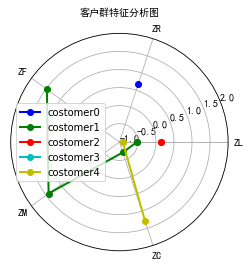

In [48]:
# 绘制雷达图
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

labels = data.columns
k = 5
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] 

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 
angles = np.concatenate((angles, [angles[0]])) 

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
for i in range(len(plot_data)):
  ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'costomer'+str(i), linewidth=2)

ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("客户群特征分析图", va='bottom', fontproperties="SimHei")
plt.legend(loc = 0)
plt.show()